# DNA Sequencing With Machine Learning

In this notebook, I will apply a classification model that can predict a gene's function based on the DNA sequence of the coding sequence alone.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
df=pd.read_csv(r'C:/Users/SAIDHANUSH/dog DNA cassification.csv')

In [4]:
df.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [5]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [7]:
df['words'] = df.apply(lambda x: getKmers(x['sequence']), axis=1)
df = df.drop('sequence', axis=1)

In [8]:
df.head()

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


In [11]:
dog_texts = list(df['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_data = df.iloc[:, 0].values 
y_data

array([4, 4, 6, 6, 0, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 0, 3, 3, 6, 6, 6, 6, 4, 0, 0, 4, 2, 0, 0, 0, 0, 6, 0, 6, 0,
       0, 5, 5, 6, 4, 6, 0, 0, 3, 6, 3, 6, 6, 6, 6, 6, 4, 6, 4, 1, 4, 0,
       0, 0, 6, 4, 4, 6, 6, 6, 6, 6, 4, 6, 6, 3, 3, 3, 3, 0, 6, 3, 3, 6,
       4, 4, 5, 6, 6, 1, 5, 2, 2, 1, 4, 2, 6, 3, 3, 6, 6, 6, 3, 3, 6, 6,
       6, 3, 6, 6, 2, 0, 0, 6, 6, 3, 3, 3, 0, 0, 4, 6, 6, 5, 1, 1, 0, 0,
       0, 4, 0, 4, 0, 0, 3, 4, 6, 0, 6, 6, 3, 4, 0, 6, 6, 1, 2, 2, 2, 3,
       6, 2, 2, 2, 6, 0, 0, 6, 6, 0, 0, 1, 6, 5, 5, 6, 0, 6, 0, 0, 4, 0,
       0, 3, 4, 0, 0, 6, 6, 5, 5, 3, 4, 1, 0, 6, 5, 6, 6, 4, 4, 2, 2, 2,
       4, 6, 4, 4, 2, 1, 3, 6, 0, 6, 2, 3, 0, 0, 6, 0, 6, 4, 3, 1, 1, 4,
       6, 4, 4, 6, 3, 3, 2, 2, 1, 1, 3, 3, 4, 3, 0, 3, 5, 5, 5, 5, 5, 5,
       5, 2, 2, 4, 4, 6, 4, 4, 6, 6, 6, 0, 3, 3, 4, 3, 0, 0, 6, 0, 0, 6,
       6, 1, 5, 5, 0, 0, 6, 6, 1, 1, 1, 4, 2, 2, 3,

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X_dog = cv.fit_transform(dog_texts)

<AxesSubplot:>

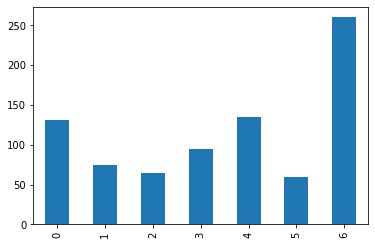

In [13]:
df['class'].value_counts().sort_index().plot.bar()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dog, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [15]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [19]:
pred=classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

In [20]:
print(confusion_matrix(y_test,pred))

[[21  0  0  0  0  0  6]
 [ 2 12  0  0  0  0  5]
 [ 1  0 10  0  0  0  3]
 [ 1  0  0  8  0  0  7]
 [ 3  0  0  2  7  0 11]
 [ 2  0  0  1  0  5  5]
 [ 0  0  0  1  0  0 51]]


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print(accuracy_score(y_test,pred))

0.6951219512195121


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier()

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
predicted=knn.predict(X_test)

In [28]:
print(accuracy_score(y_test,predicted))

0.34146341463414637


In [29]:
import xgboost

In [30]:
xgb=xgboost.XGBClassifier()

In [31]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
pred1=xgb.predict(X_test)

In [34]:
print(accuracy_score(y_test,pred1))

0.6036585365853658


In [35]:
from sklearn import svm

In [36]:
s=svm.SVC()

In [37]:
s.fit(X_train,y_train)

SVC()

In [39]:
p=s.predict(X_test)

In [40]:
print(accuracy_score(y_test,p))

0.4878048780487805


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
tr=DecisionTreeClassifier()

In [43]:
tr.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
pr=tr.predict(X_test)

In [45]:
print(accuracy_score(y_test,pr))

0.5182926829268293


In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
forest=RandomForestClassifier()

In [48]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
pre=forest.predict(X_test)

In [50]:
print(accuracy_score(y_test,pre))

0.5609756097560976
